# Result of learning

This file expose the different result of our algorithm. You can find the methodology in the README file. 

Note:
0: stand for Healthy (control)
1: for corneas with fuchs dystrophy

From dataset to training set:
ytrain[ytrain==1]=0 #Healthy
ytrain[ytrain==2]=1 #Fuchs

## Import
We import the dataset, if they do not existe we recompute using the quantification algorithm.
We also load the classification model.

In [2]:
# %matplotlib inline

from src.image_OCT_2 import *
from sklearn.model_selection import cross_val_score
from src.image_Quantification_3 import *
import math 
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from src.preproc_functions import preprocessing_OCT

import warnings
warnings.filterwarnings("ignore")

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"

# Compute or import dataset
move=True
useExpCorr=False
# folder="exp_correction/"
# append="_mov_win-exp_corr_"
append="_mov_win_"
folder=""
eliminate=30

try:
	data_healthy = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy"+append+".pkl")
except:
	repertory_healthy=os.path.join(dirname, 'Data','Healthy')
	healthy_value=1 #healthy
	data_healthy=create_new_dataset(repertory_healthy,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy.to_pickle("./Dataset/data_set_Q3_healthy"+append+".pkl")
 
try:
	data_healthy_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy_2"+append+".pkl")
except:
	repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
	healthy_value=1 #healthy
	data_healthy_2=create_new_dataset(repertory_healthy_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy_2.to_pickle("./Dataset/data_set_Q3_healthy_2"+append+".pkl")
try:
	data_haze = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze"+append+".pkl")
except:
	repertory_haze=os.path.join(dirname, 'Data','HAZE')
	healthy_value=0 #patho
	data_haze=create_new_dataset(repertory_haze,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_haze.to_pickle("./Dataset/data_set_Q3_haze"+append+".pkl")

try:
	data_haze_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze_2"+append+".pkl")
except:
	repertory_haze_2=os.path.join(dirname, 'Data','HAZE_2')
	healthy_value=0 #patho
	data_haze_2=create_new_dataset(repertory_haze_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_haze_2.to_pickle("./Dataset/data_set_Q3_haze_2"+append+".pkl")

try:
	data_fuchs = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs"+append+".pkl")
except:
	repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
	healthy_value=2 #fushs
	data_fuchs=create_new_dataset(repertory_fuchs,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_fuchs.to_pickle("./Dataset/data_set_Q3_fuchs"+append+".pkl")

try:
	data_fuchs_rep = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs_rep"+append+".pkl") 
except:
	repertory_fuchs_rep=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
	healthy_value=2 #fushs
	data_fuchs_rep=create_new_dataset(repertory_fuchs_rep,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep"+append+".pkl")
 
try:
	data_healthy_rep = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy_rep"+append+".pkl") 
except:
	repertory_healthy_rep=os.path.join(dirname, 'Data','repetabilite_Healthy')
	healthy_value=1 #Healthy
	data_healthy_rep=create_new_dataset(repertory_healthy_rep,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy_rep.to_pickle("./Dataset/data_set_Q3_healthy_rep"+append+".pkl")

print("Succesfully imported")

def to_image(healthy_value,name,flat=True):
    if healthy_value==2:
        path=os.path.join(dirname, 'Data','Fuchs_2')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==1:
        path=os.path.join(dirname, 'Data','Healthy_2')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==-1:
        path=os.path.join(dirname, 'Data','Healthy')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==0:
        path=os.path.join(dirname, 'Data','HAZE_2')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==-3:
        path=os.path.join(dirname, 'Data','HAZE')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    if flat:    
        return(im.OCT_flat) #im.OCT_brut
    else:
        return(im.OCT_brut) #im.OCT_brut

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent
Succesfully imported


In [3]:
savefold=os.path.join(dirname, 'Data\Figure_report\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"

In [4]:
import pickle

file = open('RF_Model.pkl', 'rb')
data = pickle.load(file)
[clf,dataframe,Xtrain,ytrain,Xtest,ytest]=data
dataframe_copy=dataframe.drop(["Healthy","Origin"],axis=1)
nb_param=len(Xtest.columns)

## Parameters dispersions 

Representation of the 9 quantifiers as distributions 

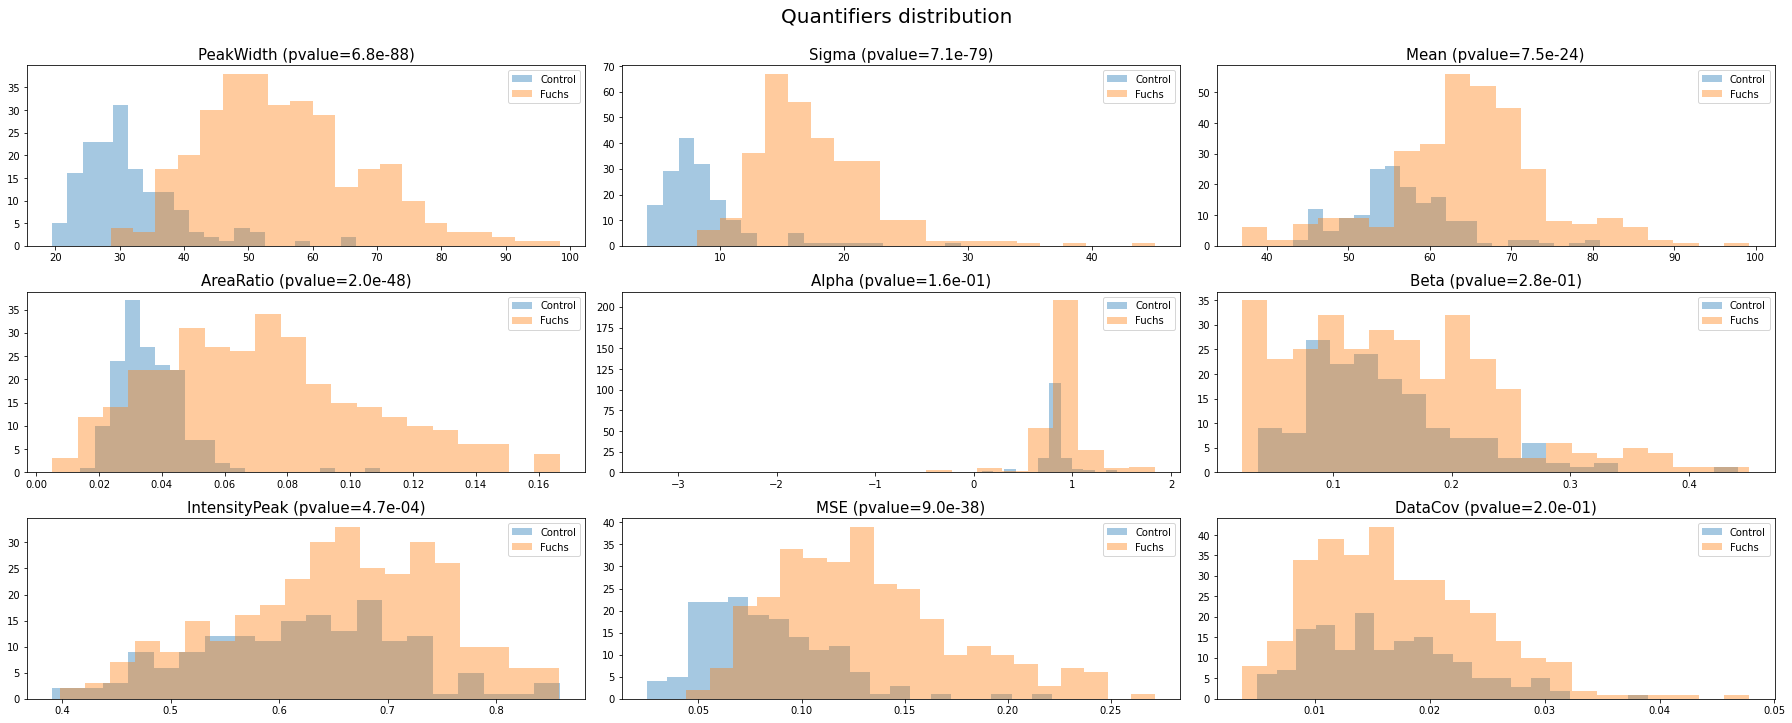

In [5]:
import seaborn as sns
from scipy import stats
fig,ax=plt.subplots(3,3,figsize=(25,10))
fig.suptitle("Quantifiers distribution",size=20,y=1)
pv=stats.ttest_ind(data_healthy_2["PeakWidth"], data_fuchs["PeakWidth"], equal_var = False)[1]
sns.distplot(data_healthy_2["PeakWidth"],  kde=False, label='Control',bins=20,ax=ax[0][0]).set_title("PeakWidth (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["PeakWidth"],  kde=False,label='Fuchs',bins=20,ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["Sigma"], data_fuchs["Sigma"], equal_var = False)[1]
sns.distplot(data_healthy_2["Sigma"],  kde=False, label='Control',bins=20,ax=ax[0][1]).set_title("Sigma (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["Sigma"],  kde=False,label='Fuchs',bins=20,ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["Mean"], data_fuchs["Mean"], equal_var = False)[1]
sns.distplot(data_healthy_2["Mean"],  kde=False, label='Control',bins=20,ax=ax[0][2]).set_title("Mean (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["Mean"],  kde=False,label='Fuchs',bins=20,ax=ax[0][2])
ax[0][2].legend()
ax[0][2].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["AreaRatio"], data_fuchs["AreaRatio"], equal_var = False)[1]
sns.distplot(data_healthy_2["AreaRatio"],  kde=False, label='Control',bins=20,ax=ax[1][0]).set_title("AreaRatio (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["AreaRatio"],  kde=False,label='Fuchs',bins=20,ax=ax[1][0])
ax[1][0].legend()
ax[1][0].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["Alpha"], data_fuchs["Alpha"], equal_var = False)[1]
sns.distplot(data_healthy_2["Alpha"],  kde=False, label='Control',bins=20,ax=ax[1][1]).set_title("Alpha (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["Alpha"],  kde=False,label='Fuchs',bins=20,ax=ax[1][1])
ax[1][1].legend()
ax[1][1].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["Beta"], data_fuchs["Beta"], equal_var = False)[1]
sns.distplot(data_healthy_2["Beta"],  kde=False, label='Control',bins=20,ax=ax[1][2]).set_title("Beta (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["Beta"],  kde=False,label='Fuchs',bins=20,ax=ax[1][2])
ax[1][2].legend()
ax[1][2].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["IntensityPeak"], data_fuchs["IntensityPeak"], equal_var = False)[1]
sns.distplot(data_healthy_2["IntensityPeak"],  kde=False, label='Control',bins=20,ax=ax[2][0]).set_title("IntensityPeak (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["IntensityPeak"],  kde=False,label='Fuchs',bins=20,ax=ax[2][0])
ax[2][0].legend()
ax[2][0].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["MSE"], data_fuchs["MSE"], equal_var = False)[1]
sns.distplot(data_healthy_2["MSE"],  kde=False, label='Control',bins=20,ax=ax[2][1]).set_title("MSE (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["MSE"],  kde=False,label='Fuchs',bins=20,ax=ax[2][1])
ax[2][1].legend()
ax[2][1].set(xlabel=None)

pv=stats.ttest_ind(data_healthy_2["DataCov"], data_fuchs["DataCov"], equal_var = False)[1]
sns.distplot(data_healthy_2["DataCov"],  kde=False, label='Control',bins=20,ax=ax[2][2]).set_title("DataCov (pvalue={:.1e})".format(pv),size=15)
sns.distplot(data_fuchs["DataCov"],  kde=False,label='Fuchs',bins=20,ax=ax[2][2])
ax[2][2].legend()
ax[2][2].set(xlabel=None)

plt.tight_layout()



## Model performances
### CrossValidation

In [6]:
scores = cross_val_score(estimator=clf, X=Xtrain, y=ytrain, cv=10, scoring='accuracy')
print("Averaged accuracy: {:.1f}%".format(100*np.mean(scores)))
print(scores)

Averaged accuracy: 93.1%
[1.         0.92307692 0.88461538 0.92307692 0.88461538 0.88461538
 0.92307692 0.92307692 1.         0.96153846]


### Test validation, and confusion matrix

In [7]:
pred = clf.predict(Xtest)
score = np.sum(pred==ytest)/len(pred)
print(score)

0.9696969696969697


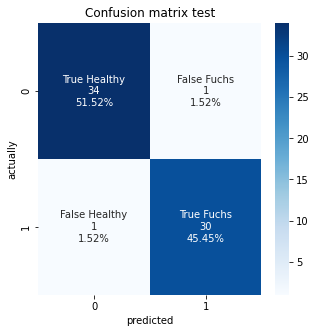

Accuracy test: 97.0%


Text(0.5, 0, 'Relative Importance')

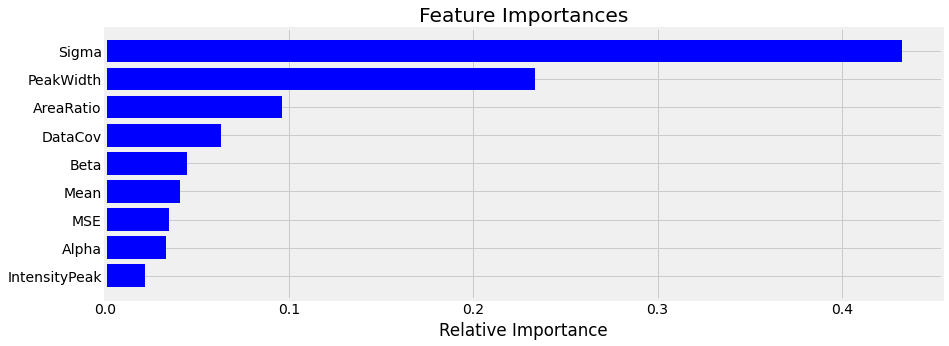

In [8]:
cf_matrix=confusion_matrix(ytest, pred)

group_names = ['True Healthy','False Fuchs','False Healthy','True Fuchs']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion matrix test")
plt.xlabel("predicted")
plt.ylabel("actually")
plt.show()
print("Accuracy test: {:.1f}%".format(accuracy_score(ytest, pred)*100))


importances = clf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [dataframe_copy.columns[i] for i in indices])
plt.xlabel('Relative Importance')

**Misclassified corneas:**

In [9]:
missmatch=np.where(ytest!=clf.predict(Xtest))
missmatch_loc=Xtest.index[missmatch]
missclass=dataframe.loc[missmatch_loc]
predicted=clf.predict(Xtest)[missmatch]
actually=(ytest.loc[missmatch_loc]).to_numpy()
probas=clf.predict_proba(Xtest)[missmatch]


KENCAR_OD_Line


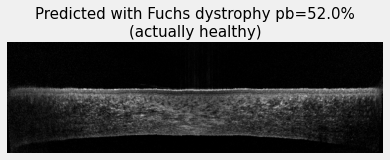

BRAMAR_OS_0_Pachy


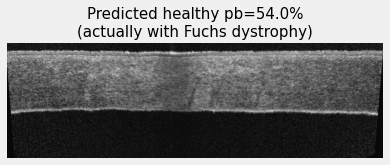

In [10]:
for i,name in enumerate(dataframe.loc[missmatch_loc]["Origin"]):
    plt.figure()
    plt.imshow(to_image(dataframe.loc[missmatch_loc[i]]["Healthy"],name,flat=True)[0:300,:],cmap='gray')
    if predicted[i]==0:
        type_pred="healthy"
        type_actually="with Fuchs dystrophy"
    else:
        type_pred="with Fuchs dystrophy"
        type_actually="healthy"
    print(dataframe.loc[missmatch_loc[i]]["Origin"])
    plt.title("Predicted "+type_pred+" pb={:.1f}".format(100*probas[i,predicted[i]])+"%\n(actually "+type_actually+")", fontsize=15)
    plt.axis('off')
    plt.grid(b=None)
    plt.show()
    

## Post-Op (PKR) evolution

Text(0.5, 1.0, 'Post-op probability evolution\n compared to before surgery through time')

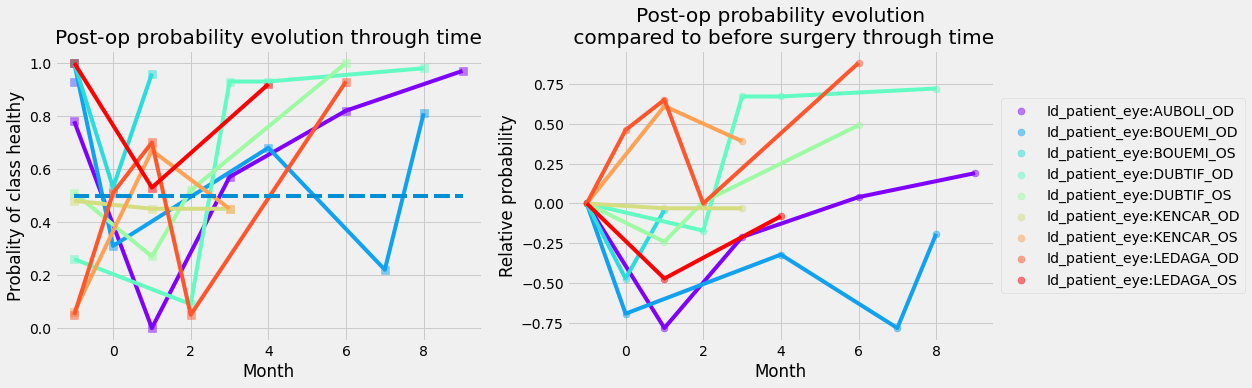

In [11]:
if 'Month' not in data_haze_2.columns:
	origin=data_haze_2["Origin"]
	n=len(origin)
	month=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		if text[-1]=="normal":
			month.append(-1)
		else:
			month.append(int(text[-1][1:]))
		id_patient.append(text[0])
		eye.append(text[1])
		id_patient_eye.append(text[0]+"_"+text[1])

	data_haze_2["Month"]=month
	data_haze_2["Id_patient"]=id_patient
	data_haze_2["Id_patient_eye"]=id_patient_eye
	data_haze_2["Eye"]=eye

data=data_haze_2
data_copy=data.drop(data.columns[nb_param:],axis=1)
# data_copy=pd.DataFrame(np.real(data_copy))
# data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]

y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)

y_pred = clf.predict(X)
proba = clf.predict_proba(X)

data["Proba"]=proba.T[0]

from matplotlib import cm
alpha=0.5
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data["Id_patient_eye"]))))
plt.figure(figsize=(15,5))
# plt.plot(data["Month"],data["Proba"])
plt.subplot(1,2,1)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
	filter=data["Id_patient_eye"]==m
	plt.scatter(data["Month"][filter],data["Proba"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.plot(data["Month"][filter],data["Proba"][filter],color=colors[i])
	plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
	plt.xlabel("Month")
	plt.ylabel("Probality of class healthy")
# plt.legend()
plt.title("Post-op probability evolution through time")
plt.subplot(1,2,2)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
	filter=data["Id_patient_eye"]==m
	if np.sum(filter)>1:
		# print(data["Proba"][filter],'\n')
		plt.scatter(data["Month"][filter],data["Proba"][filter]-np.array(data["Proba"][filter])[0],marker='o',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
		plt.plot(data["Month"][filter],data["Proba"][filter]-np.array(data["Proba"][filter])[0],color=colors[i])
		plt.xlabel("Month")
		plt.ylabel("Relative probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Post-op probability evolution\n compared to before surgery through time")


0

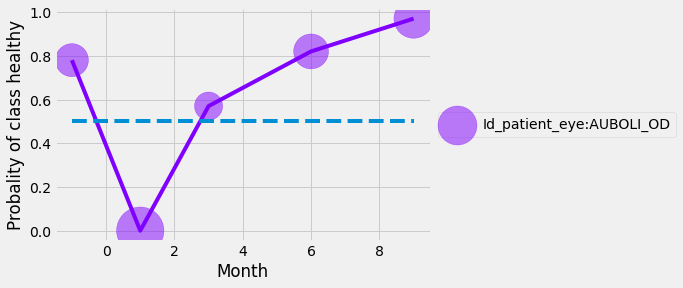

In [12]:
# id_patient_selected="BOUEMI_OD"
# id_patient_selected="BOUEMI_OS"
# id_patient_selected="LEDAGA_OS"
id_patient_selected="AUBOLI_OD"
# id_patient_selected="DUBTIF_OD"

minSNR=18
maxSNR=23

data=data_haze_2
filter=data["Month"]==-1
sub_data_healthy=data.filter(["Origin","Id_patient_eye","Proba"])[filter]

def display_patient(id_patient_selected,data,sub_data_healthy):
    for i,m in enumerate(np.unique(data["Id_patient_eye"])):
        if m==id_patient_selected:
            # print(m==sub_data_healthy["Id_patient_eye"])
            if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
                filter_=data["Id_patient_eye"]==m
                sub_data_loop=data[filter_]
                fig,ax=plt.subplots(2,len(sub_data_loop["Origin"]),figsize=(5*len(sub_data_loop["Origin"]),10))
                j=0
                for row in sub_data_loop["Origin"]:
                    filepathname=os.path.join(dirname, 'Data','HAZE_2')
                    im=image_OCT(filepathname,row+'.jpg')
                    im.AutoTreatment()
                    # snrs.append("{:.2f}".format(im.ImageSNR()))
                    snr=im.ImageSNR()
                    ascan=im.OCT_flat[:,10]
                    ascan=1*(ascan>0.50*np.max(ascan))*ascan
                    # print(data["Proba"][filter_].iloc[0])
                    pb=data["Proba"][filter_].iloc[j]
                    # print(pb,snr)
                    peak0=argrelextrema(ascan, np.greater)[0][0]
                    # peak0=20
                    ax[0][j].imshow(im.OCT_flat[np.max([peak0-20,0]):np.max([peak0-20,0])+200,::2],cmap="gray") #200:600
                    ax[1][j].imshow(im.OCT,cmap="gray")
                    ax[0][j].grid(False)
                    ax[1][j].grid(False)
                    ax[0][j].set_title("M="+str(data["Month"][filter_].iloc[j])+", P={:.3f}, SNR={:.1f}".format(pb,snr))
                    j+=1
    # plt.plot(data["Month"],data["Proba"])
    # plt.subplot(1,2,1)
    for i,m in enumerate(np.unique(data["Id_patient_eye"])):
        if m==id_patient_selected:
            plt.figure(figsize=(15,5))
            if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
                filter_=data["Id_patient_eye"]==m
                sub_data_loop=data[filter_]
                snrs=[]
                snr=[]
                for row in sub_data_loop["Origin"]:
                    filepathname=os.path.join(dirname, 'Data','HAZE_2')
                    im=image_OCT(filepathname,row+'.jpg')
                    im.AutoTreatment()
                    snrs.append("{:.2f}".format(im.ImageSNR()))
                    snr.append(im.ImageSNR())
                # print(snrs)
                s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
                plt.scatter(data["Month"][filter_],data["Proba"][filter_],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
                plt.plot(data["Month"][filter_],data["Proba"][filter_],color=colors[i])
                plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
                plt.xlabel("Month")
                plt.ylabel("Probality of class healthy")
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return(0)
    
display_patient(id_patient_selected,data,sub_data_healthy)

0

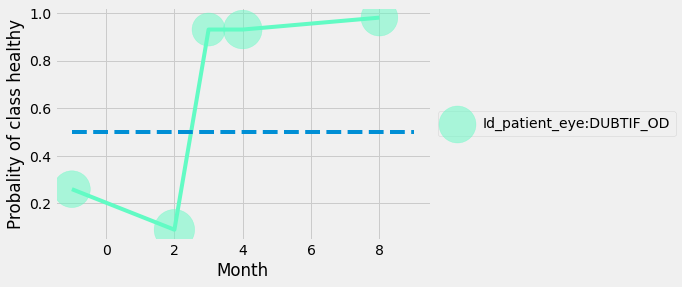

In [13]:
# id_patient_selected="BOUEMI_OD"
# id_patient_selected="BOUEMI_OS"
# id_patient_selected="LEDAGA_OS"
# id_patient_selected="AUBOLI_OD"
id_patient_selected="DUBTIF_OD"

minSNR=18
maxSNR=23

data=data_haze_2
filter=data["Month"]==-1
sub_data_healthy=data.filter(["Origin","Id_patient_eye","Proba"])[filter]

def display_patient(id_patient_selected,data,sub_data_healthy):
    for i,m in enumerate(np.unique(data["Id_patient_eye"])):
        if m==id_patient_selected:
            # print(m==sub_data_healthy["Id_patient_eye"])
            if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
                filter_=data["Id_patient_eye"]==m
                sub_data_loop=data[filter_]
                fig,ax=plt.subplots(2,len(sub_data_loop["Origin"]),figsize=(5*len(sub_data_loop["Origin"]),10))
                j=0
                for row in sub_data_loop["Origin"]:
                    filepathname=os.path.join(dirname, 'Data','HAZE_2')
                    im=image_OCT(filepathname,row+'.jpg')
                    im.AutoTreatment()
                    # snrs.append("{:.2f}".format(im.ImageSNR()))
                    snr=im.ImageSNR()
                    ascan=im.OCT_flat[:,10]
                    ascan=1*(ascan>0.50*np.max(ascan))*ascan
                    # print(data["Proba"][filter_].iloc[0])
                    pb=data["Proba"][filter_].iloc[j]
                    # print(pb,snr)
                    peak0=argrelextrema(ascan, np.greater)[0][0]
                    # peak0=20
                    ax[0][j].imshow(im.OCT_flat[np.max([peak0-20,0]):np.max([peak0-20,0])+200,::2],cmap="gray") #200:600
                    ax[1][j].imshow(im.OCT,cmap="gray")
                    ax[0][j].grid(False)
                    ax[1][j].grid(False)
                    ax[0][j].set_title("M="+str(data["Month"][filter_].iloc[j])+", P={:.3f}, SNR={:.1f}".format(pb,snr))
                    j+=1
    # plt.plot(data["Month"],data["Proba"])
    # plt.subplot(1,2,1)
    for i,m in enumerate(np.unique(data["Id_patient_eye"])):
        if m==id_patient_selected:
            plt.figure(figsize=(15,5))
            if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
                filter_=data["Id_patient_eye"]==m
                sub_data_loop=data[filter_]
                snrs=[]
                snr=[]
                for row in sub_data_loop["Origin"]:
                    filepathname=os.path.join(dirname, 'Data','HAZE_2')
                    im=image_OCT(filepathname,row+'.jpg')
                    im.AutoTreatment()
                    snrs.append("{:.2f}".format(im.ImageSNR()))
                    snr.append(im.ImageSNR())
                # print(snrs)
                s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
                plt.scatter(data["Month"][filter_],data["Proba"][filter_],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
                plt.plot(data["Month"][filter_],data["Proba"][filter_],color=colors[i])
                plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
                plt.xlabel("Month")
                plt.ylabel("Probality of class healthy")
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return(0)
    
display_patient(id_patient_selected,data,sub_data_healthy)

**Same representation but using the most important feature of the model:**

Text(0.5, 1.0, 'Post-op value of quantifier sigma evolution\n compared to before surgery through time')

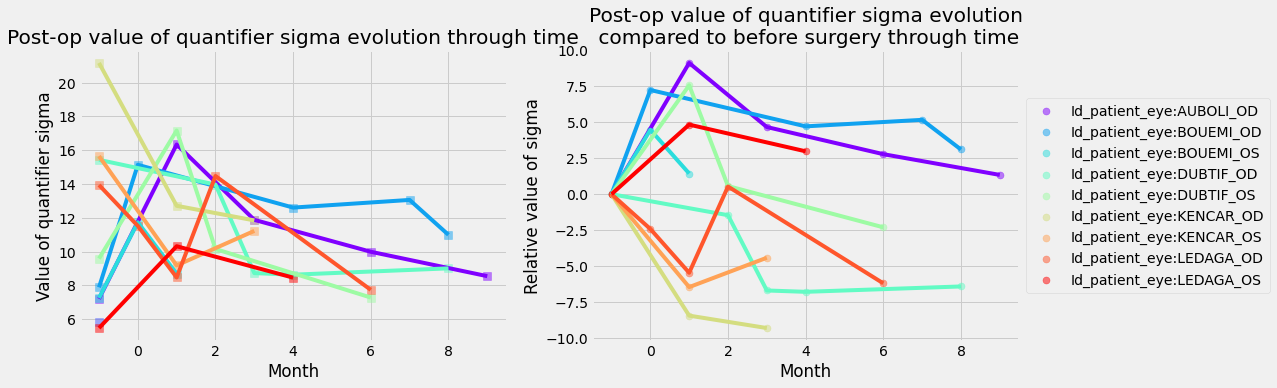

In [14]:
if 'Month' not in data_haze_2.columns:
	origin=data_haze_2["Origin"]
	n=len(origin)
	month=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		if text[-1]=="normal":
			month.append(-1)
		else:
			month.append(int(text[-1][1:]))
		id_patient.append(text[0])
		eye.append(text[1])
		id_patient_eye.append(text[0]+"_"+text[1])

	data_haze_2["Month"]=month
	data_haze_2["Id_patient"]=id_patient
	data_haze_2["Id_patient_eye"]=id_patient_eye
	data_haze_2["Eye"]=eye

data=data_haze_2
data_copy=data.drop(data.columns[nb_param:],axis=1)
# data_copy=pd.DataFrame(np.real(data_copy))
# data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]

y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)

y_pred = clf.predict(X)
proba = clf.predict_proba(X)

data["Proba"]=proba.T[0]

from matplotlib import cm
alpha=0.5
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data["Id_patient_eye"]))))
plt.figure(figsize=(15,5))
# plt.plot(data["Month"],data["Proba"])
plt.subplot(1,2,1)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
	filter=data["Id_patient_eye"]==m
	plt.scatter(data["Month"][filter],data["Sigma"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.plot(data["Month"][filter],data["Sigma"][filter],color=colors[i])
	# plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
	plt.xlabel("Month")
	plt.ylabel("Value of quantifier sigma")
# plt.legend()
plt.title("Post-op value of quantifier sigma evolution through time")
plt.subplot(1,2,2)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
	filter=data["Id_patient_eye"]==m
	if np.sum(filter)>1:
		# print(data["Proba"][filter],'\n')
		plt.scatter(data["Month"][filter],data["Sigma"][filter]-np.array(data["Sigma"][filter])[0],marker='o',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
		plt.plot(data["Month"][filter],data["Sigma"][filter]-np.array(data["Sigma"][filter])[0],color=colors[i])
		plt.xlabel("Month")
		plt.ylabel("Relative value of sigma")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Post-op value of quantifier sigma evolution\n compared to before surgery through time")


## Haze labeled images

6    80608_REZAZK_OD
Name: Origin, dtype: object
Series([], Name: Origin, dtype: object)


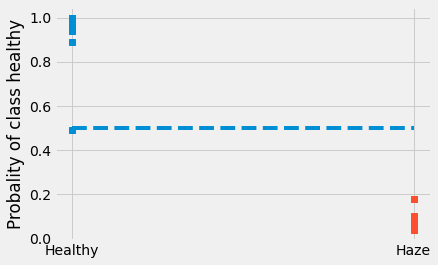

In [15]:
data=data_healthy
data_copy=data.drop(data.columns[nb_param:],axis=1)
new_data=data_copy
new_data["Healthy"]=data["Healthy"]
y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)
y_pred = clf.predict(X)
proba = clf.predict_proba(X)
data["Proba"]=proba.T[0]

healthy=data["Proba"]
print(data["Origin"][data["Proba"]<0.5])

data=data_haze
data_copy=data.drop(data.columns[nb_param:],axis=1)
new_data=data_copy
new_data["Healthy"]=data["Healthy"]
y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)
y_pred = clf.predict(X)
proba = clf.predict_proba(X)
data["Proba"]=proba.T[0]
print(data["Origin"][data["Proba"]>0.5])

haze=data["Proba"]
plt.plot(["Healthy"]*len(healthy),healthy,'s')
plt.plot(["Haze"]*len(haze),haze,'s')
plt.ylabel("Probality of class healthy")
plt.hlines(y=0.5,xmin='Healthy',xmax="Haze",linestyles='--')

**Same graph but using sigma (the most important feature of the model)**

6    80608_REZAZK_OD
Name: Origin, dtype: object
Series([], Name: Origin, dtype: object)


Text(0, 0.5, 'Value of quantifier sigma')

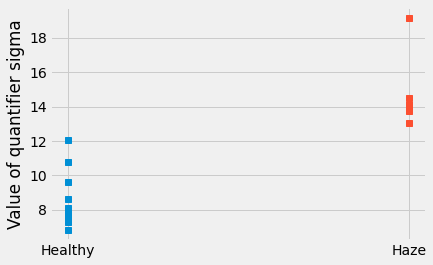

In [16]:
data=data_healthy
data_copy=data.drop(data.columns[nb_param:],axis=1)
new_data=data_copy
new_data["Healthy"]=data["Healthy"]
y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)
y_pred = clf.predict(X)
proba = clf.predict_proba(X)
data["Proba"]=proba.T[0]

healthy=data["Sigma"]
print(data["Origin"][data["Proba"]<0.5])

data=data_haze
data_copy=data.drop(data.columns[nb_param:],axis=1)
new_data=data_copy
new_data["Healthy"]=data["Healthy"]
y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)
y_pred = clf.predict(X)
proba = clf.predict_proba(X)
data["Proba"]=proba.T[0]
print(data["Origin"][data["Proba"]>0.5])

haze=data["Sigma"]
plt.plot(["Healthy"]*len(healthy),healthy,'s')
plt.plot(["Haze"]*len(haze),haze,'s')
plt.ylabel("Value of quantifier sigma")

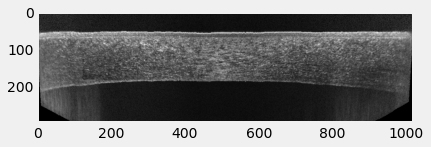

In [17]:
plt.imshow(to_image(-1,"80608_REZAZK_OD",flat=True)[100:400,:],cmap='gray')
plt.grid(b=None)

## Repetability

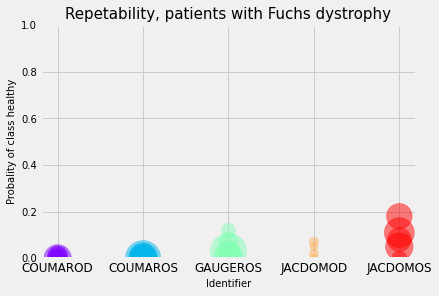

Error with:  c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\repetabilite_Healthy ITZMAR_0.jpg
Error with:  c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\repetabilite_Healthy ITZMAR_3.jpg


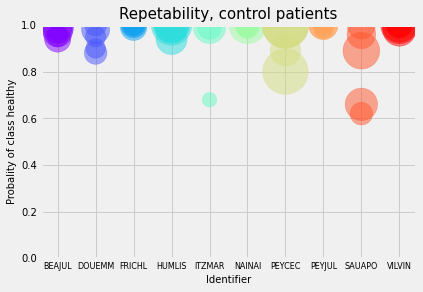

In [18]:
X_rep=data_fuchs_rep.drop(["Healthy","Origin"],axis=1)
y_rep=data_fuchs_rep["Healthy"]
data_rep=data_fuchs_rep.copy()
y_pred = clf.predict(X_rep)
proba = clf.predict_proba(X_rep)

data_rep["Proba"]=proba.T[0]

if 'Id_patient_eye' not in data_rep.columns:
	origin=data_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0]+text[2])
		eye.append(text[2])

	data_rep["Repetition"]=repetition
	data_rep["Id_patient"]=id_patient
	data_rep["Id_patient_eye"]=id_patient_eye
	data_rep["Eye"]=eye
	# data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")
 
minSNR=18
maxSNR=23

labels_rep=[]
values_rep=[]
colors_rep=[]
size_dot_rep=[]

plt.figure(figsize=(20,5))

# plt.subplot(121)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_rep["Id_patient_eye"]))))
for i,m in enumerate(np.unique(data_rep["Id_patient_eye"])):
	filter=data_rep["Id_patient_eye"]==m
	sub_data=data_rep[filter]
	snrs=[]
	snr=[]
	for row in sub_data["Origin"]:
		filepathname=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
		im=image_OCT(filepathname,row+'.jpg')
		im.AutoTreatment()
		snrs.append("{:.2f}".format(im.ImageSNR()))
		snr.append(im.ImageSNR())
	# print(snrs)
	s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
	values_rep+=list(data_rep["Proba"][filter])
	labels_rep+=list(data_rep["Id_patient_eye"][filter])
	colors_rep+=[colors[i]]*len(list(data_rep["Proba"][filter]))
	size_dot_rep+=s
	# plt.scatter(data_rep["Id_patient_eye"][filter],data_rep["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
	
	# plt.xlabel("Sigma")
	# plt.ylabel("Mean")
plt.scatter(labels_rep,values_rep,marker='o',color=colors_rep,s=size_dot_rep,label="Id_patient_eye:"+str(m),alpha=alpha)
plt.ylim([0.0,1])
values_rep_fuchs=values_rep
# plt.legend()
plt.title("Repetability, patients with Fuchs dystrophy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Identifier", fontsize=10)
plt.ylabel("Probality of class healthy", fontsize=10)
plt.show()

X_rep=data_healthy_rep.drop(["Healthy","Origin"],axis=1)
y_rep=data_healthy_rep["Healthy"]
data_rep=data_healthy_rep.copy()
y_pred = clf.predict(X_rep)
proba = clf.predict_proba(X_rep)

data_rep["Proba"]=proba.T[0]

if 'Id_patient_eye' not in data_rep.columns:
	origin=data_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0])

	data_rep["Repetition"]=repetition
	data_rep["Id_patient"]=id_patient
	data_rep["Id_patient_eye"]=id_patient_eye
	# data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")
 
minSNR=18
maxSNR=23

labels_rep=[]
values_rep=[]
colors_rep=[]
size_dot_rep=[]
values=[]
plt.figure(figsize=(40,5))
# plt.subplot(122)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_rep["Id_patient_eye"]))))
bool_list=[]
for i,m in enumerate(np.unique(data_rep["Id_patient_eye"])):
	filter=data_rep["Id_patient_eye"]==m
	sub_data=data_rep[filter]
	snrs=[]
	snr=[]
	for row in sub_data["Origin"]:
		filepathname=os.path.join(dirname, 'Data','repetabilite_Healthy')
		try:
			im=image_OCT(filepathname,row+'.jpg')
			im.AutoTreatment()
			snrs.append("{:.2f}".format(im.ImageSNR()))
			snr.append(im.ImageSNR())
			bool_list.append(True)
		except:
			print("Error with: ",filepathname,row+'.jpg')
			bool_list.append(False)
	# print(snrs)
	s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
	values_rep+=list(data_rep["Proba"][filter])
	labels_rep+=list(data_rep["Id_patient_eye"][filter])
	colors_rep+=[colors[i]]*len(list(data_rep["Proba"][filter]))
	size_dot_rep+=s
	# plt.scatter(data_rep["Id_patient_eye"][filter],data_rep["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
	
	# plt.xlabel("Sigma")
	# plt.ylabel("Mean")
bool_array=np.array(bool_list)
plt.scatter(np.array(labels_rep)[bool_array],np.array(values_rep)[bool_array],marker='o',color=np.array(colors_rep)[bool_array],s=size_dot_rep,label="Id_patient_eye:"+str(m),alpha=alpha)
values_rep_healthy=values_rep
plt.ylim([0.0,1])
# plt.legend()
# plt.title("Repetability Q3 move:"+str(move)+" expcorr:"+str(useExpCorr), fontsize=15)
plt.title("Repetability, control patients", fontsize=15)
plt.xticks(fontsize=8)
plt.xlabel("Identifier", fontsize=10)
plt.ylabel("Probality of class healthy", fontsize=10)
plt.yticks(fontsize=10)
plt.show()



Text(0, 0.5, 'Probality of class healthy')

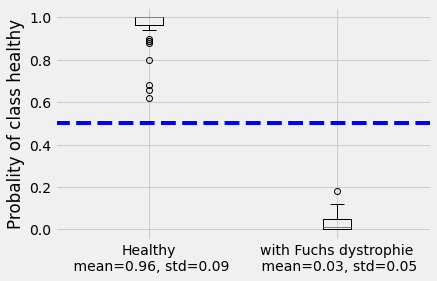

In [19]:

plt.boxplot([values_rep_healthy,values_rep_fuchs])
plt.hlines(y=0.5,xmin=0.5,xmax=2.5,colors="blue",linestyles="--")
plt.xticks ([1,2],["Healthy\n mean={:.2f}, std={:.2f}".format(np.mean(values_rep_healthy),np.std(values_rep_healthy)),"with Fuchs dystrophie\n mean={:.2f}, std={:.2f}".format(np.mean(values_rep_fuchs),np.std(values_rep_fuchs))])
plt.ylabel("Probality of class healthy")

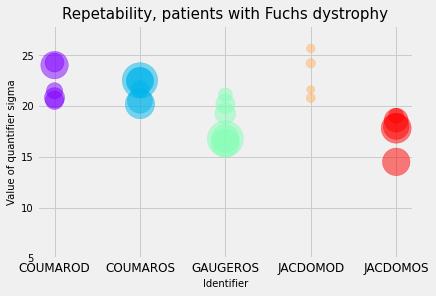

Error with:  c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\repetabilite_Healthy ITZMAR_0.jpg
Error with:  c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\repetabilite_Healthy ITZMAR_3.jpg


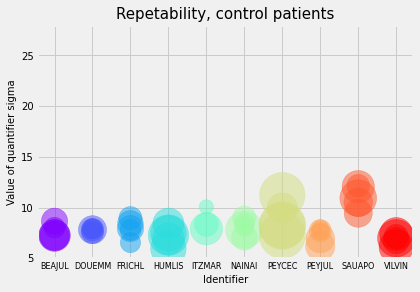

In [20]:
X_rep=data_fuchs_rep.drop(["Healthy","Origin"],axis=1)
y_rep=data_fuchs_rep["Healthy"]
data_rep=data_fuchs_rep.copy()
y_pred = clf.predict(X_rep)
proba = clf.predict_proba(X_rep)

data_rep["Proba"]=proba.T[0]

if 'Id_patient_eye' not in data_rep.columns:
	origin=data_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0]+text[2])
		eye.append(text[2])

	data_rep["Repetition"]=repetition
	data_rep["Id_patient"]=id_patient
	data_rep["Id_patient_eye"]=id_patient_eye
	data_rep["Eye"]=eye
	# data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")
 
minSNR=18
maxSNR=23

labels_rep=[]
values_rep=[]
colors_rep=[]
size_dot_rep=[]

plt.figure(figsize=(20,5))

# plt.subplot(121)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_rep["Id_patient_eye"]))))
for i,m in enumerate(np.unique(data_rep["Id_patient_eye"])):
	filter=data_rep["Id_patient_eye"]==m
	sub_data=data_rep[filter]
	snrs=[]
	snr=[]
	for row in sub_data["Origin"]:
		filepathname=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
		im=image_OCT(filepathname,row+'.jpg')
		im.AutoTreatment()
		snrs.append("{:.2f}".format(im.ImageSNR()))
		snr.append(im.ImageSNR())
	# print(snrs)
	s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
	values_rep+=list(data_rep["Sigma"][filter])
	labels_rep+=list(data_rep["Id_patient_eye"][filter])
	colors_rep+=[colors[i]]*len(list(data_rep["Sigma"][filter]))
	size_dot_rep+=s
	# plt.scatter(data_rep["Id_patient_eye"][filter],data_rep["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
	
	# plt.xlabel("Sigma")
	# plt.ylabel("Mean")
plt.scatter(labels_rep,values_rep,marker='o',color=colors_rep,s=size_dot_rep,label="Id_patient_eye:"+str(m),alpha=alpha)
plt.ylim([5,28])
values_rep_fuchs=values_rep
# plt.legend()
plt.title("Repetability, patients with Fuchs dystrophy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Identifier", fontsize=10)
plt.ylabel("Value of quantifier sigma", fontsize=10)
plt.show()

X_rep=data_healthy_rep.drop(["Healthy","Origin"],axis=1)
y_rep=data_healthy_rep["Healthy"]
data_rep=data_healthy_rep.copy()
y_pred = clf.predict(X_rep)
proba = clf.predict_proba(X_rep)

data_rep["Proba"]=proba.T[0]

if 'Id_patient_eye' not in data_rep.columns:
	origin=data_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0])

	data_rep["Repetition"]=repetition
	data_rep["Id_patient"]=id_patient
	data_rep["Id_patient_eye"]=id_patient_eye
	# data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")
 
minSNR=18
maxSNR=23

labels_rep=[]
values_rep=[]
colors_rep=[]
size_dot_rep=[]
values=[]
plt.figure(figsize=(40,5))
# plt.subplot(122)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_rep["Id_patient_eye"]))))
bool_list=[]
for i,m in enumerate(np.unique(data_rep["Id_patient_eye"])):
	filter=data_rep["Id_patient_eye"]==m
	sub_data=data_rep[filter]
	snrs=[]
	snr=[]
	for row in sub_data["Origin"]:
		filepathname=os.path.join(dirname, 'Data','repetabilite_Healthy')
		try:
			im=image_OCT(filepathname,row+'.jpg')
			im.AutoTreatment()
			snrs.append("{:.2f}".format(im.ImageSNR()))
			snr.append(im.ImageSNR())
			bool_list.append(True)
		except:
			print("Error with: ",filepathname,row+'.jpg')
			bool_list.append(False)
	# print(snrs)
	s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
	values_rep+=list(data_rep["Sigma"][filter])
	labels_rep+=list(data_rep["Id_patient_eye"][filter])
	colors_rep+=[colors[i]]*len(list(data_rep["Sigma"][filter]))
	size_dot_rep+=s
	# plt.scatter(data_rep["Id_patient_eye"][filter],data_rep["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
	
	# plt.xlabel("Sigma")
	# plt.ylabel("Mean")
bool_array=np.array(bool_list)
plt.scatter(np.array(labels_rep)[bool_array],np.array(values_rep)[bool_array],marker='o',color=np.array(colors_rep)[bool_array],s=size_dot_rep,label="Id_patient_eye:"+str(m),alpha=alpha)
values_rep_healthy=values_rep
plt.ylim([5,28])
# plt.legend()
# plt.title("Repetability Q3 move:"+str(move)+" expcorr:"+str(useExpCorr), fontsize=15)
plt.title("Repetability, control patients", fontsize=15)
plt.xticks(fontsize=8)
plt.xlabel("Identifier", fontsize=10)
plt.ylabel("Value of quantifier sigma", fontsize=10)
plt.yticks(fontsize=10)
plt.show()



Text(0, 0.5, 'Value of quantifier sigma')

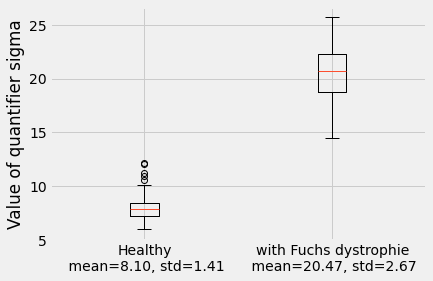

In [21]:

plt.boxplot([values_rep_healthy,values_rep_fuchs])
plt.xticks ([1,2],["Healthy\n mean={:.2f}, std={:.2f}".format(np.mean(values_rep_healthy),np.std(values_rep_healthy)),"with Fuchs dystrophie\n mean={:.2f}, std={:.2f}".format(np.mean(values_rep_fuchs),np.std(values_rep_fuchs))])
plt.ylabel("Value of quantifier sigma")

# Probability distribution

In [24]:
data_healthy_2

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Alpha,Beta,IntensityPeak,Healthy,Origin
0,27.406858,6.989257,0.030725,46.744403,0.114336,0.038745,0.829877,0.115839,0.812316,1,ARAILI_OS_Line
1,23.067298,6.261055,0.021590,43.204959,0.092799,0.027687,0.758035,0.107512,0.708638,1,ARAILI_OS_Pachy
2,29.219136,7.231216,0.018736,49.887554,0.078659,0.028708,0.788758,0.045320,0.719323,1,BEGABD_OD_Cross
3,24.563983,5.489219,0.024172,51.135865,0.073090,0.033183,0.812253,0.084375,0.749704,1,BEGABD_OD_Pachy
4,25.279280,5.847394,0.029017,50.337400,0.087817,0.037466,0.825671,0.107444,0.774903,1,BEGABD_OS_Cross
...,...,...,...,...,...,...,...,...,...,...,...
158,29.887690,7.761626,0.021866,54.188788,0.120155,0.041902,0.918192,0.120062,0.773831,1,TOUMAT_OS_Pachy
159,28.860525,6.430009,0.008187,64.065788,0.045431,0.028801,0.810799,0.142455,0.516163,1,WIETIP_OD_Line
160,20.132367,4.171387,0.007039,57.563812,0.028219,0.021665,0.761239,0.217357,0.390970,1,WIETIP_OD_Pachy
161,25.133311,5.377259,0.015622,56.491495,0.047281,0.030448,0.986227,0.093668,0.594292,1,WIETIP_OS_Line


In [25]:
pb_healthy=clf.predict_proba(data_healthy_2.drop(["Origin","Healthy"],axis=1)).T[0]
pb_fuchs=clf.predict_proba(data_fuchs.drop(["Origin","Healthy"],axis=1)).T[0]

Text(0, 0.5, 'Probability of class healthy')

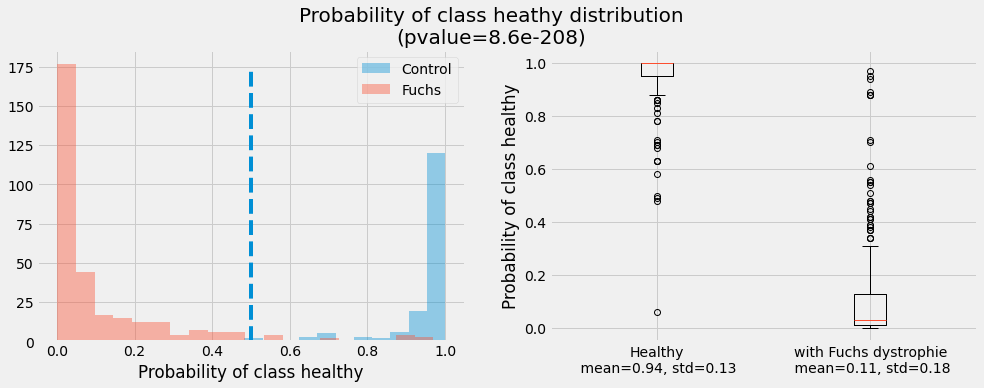

In [34]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
pv=stats.ttest_ind(pb_healthy,pb_fuchs, equal_var = False)[1]
fig.suptitle("Probability of class heathy distribution\n(pvalue={:.1e})".format(pv),size=20,y=1)
sns.distplot(pb_healthy,  kde=False, label='Control',bins=20,ax=ax[0])
ax[0].set_xlabel("Probability of class healthy")
sns.distplot(pb_fuchs,  kde=False,label='Fuchs',bins=20,ax=ax[0])
ax[0].vlines(x=0.5,ymin=0, ymax=175,linestyles='--')
ax[0].legend()
# ax[0].set_title("Distribution")
# ax[0].set(xlabel=None)

ax[1].boxplot([pb_healthy,pb_fuchs])
ax[1].set_xticks ([1,2],["Healthy\n mean={:.2f}, std={:.2f}".format(np.mean(pb_healthy),np.std(pb_healthy)),"with Fuchs dystrophie\n mean={:.2f}, std={:.2f}".format(np.mean(pb_fuchs),np.std(pb_fuchs))])
ax[1].set_ylabel("Probability of class healthy")
